<a href="https://colab.research.google.com/github/shweta-todgire/Data-Science-Codes/blob/main/DimensionalityReduction_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving FOOD-DATA.csv to FOOD-DATA.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
df = pd.read_csv("FOOD-DATA.csv")
print(df.head())

   Unnamed: 0.1  Unnamed: 0                              food  Caloric Value  \
0             0           0                      cream cheese             51   
1             1           1                 neufchatel cheese            215   
2             2           2  requeijao cremoso light catupiry             49   
3             3           3                    ricotta cheese             30   
4             4           4              cream cheese low fat             30   

    Fat  Saturated Fats  Monounsaturated Fats  Polyunsaturated Fats  \
0   5.0             2.9                   1.3                 0.200   
1  19.4            10.9                   4.9                 0.800   
2   3.6             2.3                   0.9                 0.000   
3   2.0             1.3                   0.5                 0.002   
4   2.3             1.4                   0.6                 0.042   

   Carbohydrates  Sugars  ...  Calcium  Copper   Iron  Magnesium  Manganese  \
0            

In [12]:
non_numeric_cols = ['Unnamed: 0', 'food']   # remove ID + food name
numeric_df = df.drop(columns=non_numeric_cols, errors='ignore')
# Keep only numeric columns
numeric_df = numeric_df.select_dtypes(include=['int64', 'float64'])

X = numeric_df.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.99, whiten=True)
X_pca = pca.fit_transform(X_scaled)

print("Original feature count:", X_scaled.shape[1])
print("Reduced feature count (PCA):", X_pca.shape[1])
print("PCA explained variance ratio:", pca.explained_variance_ratio_)

Original feature count: 35
Reduced feature count (PCA): 29
PCA explained variance ratio: [0.2463441  0.13639307 0.10691925 0.07000371 0.04602779 0.04101679
 0.03737406 0.03078742 0.029564   0.02709504 0.02479925 0.02164958
 0.02078887 0.01884419 0.01804278 0.01536736 0.01301152 0.01208294
 0.01061889 0.00929583 0.00856045 0.0077527  0.00755223 0.00707386
 0.00655347 0.00566237 0.00521826 0.00441631 0.00385688]


In [7]:
kpca = KernelPCA(kernel="rbf", gamma=0.1, n_components=2)
X_kpca = kpca.fit_transform(X_scaled)

print("Original feature count:", X_scaled.shape[1])
print("Reduced feature count (Kernel PCA):", X_kpca.shape[1])

Original feature count: 35
Reduced feature count (Kernel PCA): 2


In [8]:
y = np.random.choice([0, 1], size=len(df))

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(X_scaled, y).transform(X_scaled)

print("Reduced feature count (LDA):", X_lda.shape[1])
print("LDA explained variance ratio:", lda.explained_variance_ratio_)


Reduced feature count (LDA): 1
LDA explained variance ratio: [1.]


Text(0, 0.5, 'Feature 2')

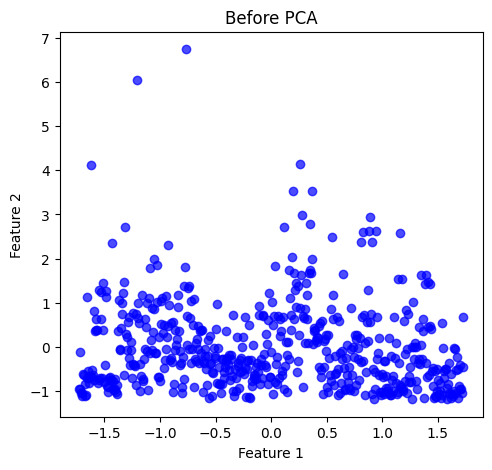

In [9]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c='blue', alpha=0.7)
plt.title("Before PCA")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")


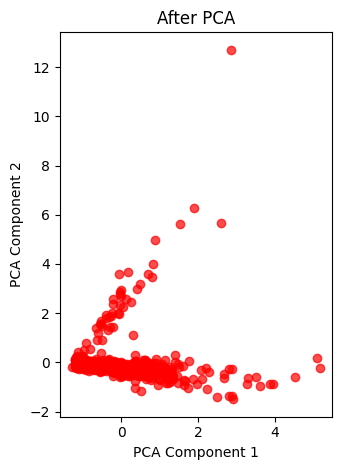

In [10]:
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c='red', alpha=0.7)
plt.title("After PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()